
# Reto, Aplicación de métodos multivariados en ciencia de datos
### Analisis de contaminanates en la zona metropolitana de monterrey

## Lectura de bases de datos y librerias


In [1]:
# Librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
from scipy import stats
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
import pingouin as pg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2
from factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import calculate_kmo
from scipy.stats import shapiro

In [2]:
# Base de datos de contaminantes dividido por pestañas, del 1 de enero del 2022 hasta el 17 de agosto del 2023
excel_aire_2022_2023 = 'DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES (1).xlsx'

df_aire_2022_2023 = pd.read_excel(excel_aire_2022_2023, sheet_name = 'MAIN').copy()
df_aire_2022_2023 = df_aire_2022_2023.copy()
df_aire_2022_2023

,date,SURESTE,SURESTE.1,SURESTE.2,SURESTE.3,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.7,SURESTE.8,...,NOROESTE 3.5,NOROESTE 3.6,NOROESTE 3.7,NOROESTE 3.8,NOROESTE 3.9,NOROESTE 3.10,NOROESTE 3.11,NOROESTE 3.12,NOROESTE 3.13,NOROESTE 3.14
0,NaT,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,...,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
1,NaT,ppm,ppb,ppb,ppb,ppb,ug/m3,ug/m3,mmhg,mm/hr,...,ug/m3,ug/m3,mmhg,mm/hr,%,ppb,KW/m2,degC,KMPH,DEG
2,2022-01-01 00:00:00,2.36,19.8,48.4,68,5,142,111,715.7,0,...,36,NaN,726.9,0,69,2.2,0,12.28,9.5,172
3,2022-01-01 01:00:00,2.29,10.8,44.5,55.1,6,168,112.16,715.5,0,...,37,NaN,726.5,0,78,2.1,0,10.95,8,190
4,2022-01-01 02:00:00,2.71,28.3,47.1,75.2,4,203,139.31,715.4,0,...,35,NaN,726.1,0,81,2.2,0,10.57,4.9,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14252,2023-08-17 19:00:00,1.43,3.4,7.9,11.3,38,45,11.13,719.9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14253,2023-08-17 20:00:00,1.48,NaN,14.8,18.2,30,41,11.17,720.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14254,2023-08-17 21:00:00,1.47,3.2,14.4,17.4,27,49,10.71,720.6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14255,2023-08-17 22:00:00,1.42,3,10.3,13.3,29,38,10.01,721.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Base de datos de contaminantes todas las estaciones juntas, del 1 de enero del 2023 hasta el 31 de julio del 2024
excel_aire_2023_2024 = "DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM (1).xlsx"

df_aire_2023_2024 = pd.read_excel(excel_aire_2023_2024, sheet_name = 'Param_horarios_Estaciones')
df_aire_2023_2024 = df_aire_2023_2024.copy()
df_aire_2023_2024


,date,SURESTE,SURESTE.1,SURESTE.2,SURESTE.3,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.7,SURESTE.8,...,NOROESTE 3.5,NOROESTE 3.6,NOROESTE 3.7,NOROESTE 3.8,NOROESTE 3.9,NOROESTE 3.10,NOROESTE 3.11,NOROESTE 3.12,NOROESTE 3.13,NOROESTE 3.14
0,NaT,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,...,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
1,NaT,ppm,ppb,ppb,ppb,ppb,ug/m3,ug/m3,mmhg,mm/hr,...,ug/m3,ug/m3,mmhg,mm/hr,%,ppb,KW/m2,degC,KMPH,DEG
2,2023-01-01 00:00:00,2.37,54.5,32.6,87.1,3,110,68,721.7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 01:00:00,2.12,38.7,30.3,68.9,3,116,67.18,721.5,0,...,246,NaN,707.4,0,59,2.9,0,14.14,65.3,95
4,2023-01-01 02:00:00,2.05,38.7,28.8,67.4,3,117,75.12,721.1,0,...,239,NaN,707,0,59,3.2,0,14.11,60.9,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,2024-07-31 19:00:00,0.67,NaN,4.3,7.5,26,88,NaN,721.7,0,...,117,13.73,707.5,0,46,2.8,0.003,29.87,13.1,63
13868,2024-07-31 20:00:00,0.66,2.9,4.5,7.4,24,94,NaN,721.8,0,...,90,13.05,707.9,0,48,2.7,0,28.93,11.8,41
13869,2024-07-31 21:00:00,0.65,2.7,3.9,6.6,24,83,NaN,722.1,0,...,90,12.72,708.4,0,50,3,0,28.31,11.6,41
13870,2024-07-31 22:00:00,0.65,2.8,3.9,6.7,23,95,NaN,722.5,0,...,104,13.63,709.1,0,58,3,0,27.25,15.3,35


## Preparación de los datos

In [4]:
# Dividir las 2 bases de datos en los diferentes años
df_aire_2022 = df_aire_2022_2023[df_aire_2022_2023['date'] < pd.Timestamp('2023-01-01 00:00:00')]
df_aire_2023 = df_aire_2023_2024[(df_aire_2023_2024['date'] >= pd.Timestamp('2023-01-01 00:00:00')) & (df_aire_2023_2024['date'] < pd.Timestamp('2024-01-01 00:00:00'))]
df_aire_2024 = df_aire_2023_2024[(df_aire_2023_2024['date'] >= pd.Timestamp('2023-12-31 00:00:00')) & (df_aire_2023_2024['date'] < pd.Timestamp('2024-04-01 00:00:00'))]

In [5]:
# Fusion de las bases de datos de los 3 años
df_aire = pd.concat([df_aire_2022, df_aire_2023, df_aire_2024])
df_aire = df_aire.reset_index(drop=True)
df_aire.columns

Index(['date', 'SURESTE', 'SURESTE.1', 'SURESTE.2', 'SURESTE.3', 'SURESTE.4',
       'SURESTE.5', 'SURESTE.6', 'SURESTE.7', 'SURESTE.8',
       ...
       'NOROESTE 3.5', 'NOROESTE 3.6', 'NOROESTE 3.7', 'NOROESTE 3.8',
       'NOROESTE 3.9', 'NOROESTE 3.10', 'NOROESTE 3.11', 'NOROESTE 3.12',
       'NOROESTE 3.13', 'NOROESTE 3.14'],
      dtype='object', length=240)

#### Función para crear una estación

In [7]:
# Crear la variable periodo
def get_estacion(fecha):

    year = fecha.year
    
    # Definir las fechas de inicio de cada estación
    primavera_inicio = pd.Timestamp(year=year, month=3, day=21)
    verano_inicio = pd.Timestamp(year=year, month=6, day=21)
    otono_inicio = pd.Timestamp(year=year, month=9, day=23)
    invierno_inicio = pd.Timestamp(year=year, month=12, day=21)
    
    if primavera_inicio <= fecha < verano_inicio:
        estacion = "Primavera"
    elif verano_inicio <= fecha < otono_inicio:
        estacion = "Verano"
    elif otono_inicio <= fecha < invierno_inicio:
        estacion = "Otoño"
    else: 
        estacion = "Invierno"

    return estacion



In [97]:
# Aplicar la función para crear la columna 'estacion'
df_aire['estacion'] = df_aire['date'].apply(get_estacion)

# Reordenar las columnas, moviendo 'estacion' a la segunda posición
# Primero obtenemos todas las columnas
columnas = df_aire.columns.tolist()

# Insertar la columna 'estacion' en la segunda posición
columnas.insert(1, columnas.pop(columnas.index('estacion')))

# Reordenar el DataFrame con el nuevo orden de columnas
df_aire = df_aire[columnas]


np.int64(0)

## Limpieza de los datos

In [98]:
df_aire = df_aire.copy()

# Eliminar columnas de solo NANs
df_aire = df_aire.dropna(axis=1, how='all')

# Eliminar valores meteorologicos
malas_columns = df_aire.columns[df_aire.columns.str.endswith(tuple(['.3','.7', '.8', '.9', '.11', '.12', '.13', '.14']))]
df_aire = df_aire.drop(columns=malas_columns)

df_aire.head()

,date,estacion,SURESTE,SURESTE.1,SURESTE.2,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.10,NORESTE,...,NORESTE 3.4,NORESTE 3.5,NORESTE 3.10,NOROESTE 3,NOROESTE 3.1,NOROESTE 3.2,NOROESTE 3.4,NOROESTE 3.5,NOROESTE 3.6,NOROESTE 3.10
0,2022-01-01 00:00:00,Invierno,2.36,19.8,48.4,5,142,111,4,4.73,...,19.9,54,4.4,0.55,2.8,5.8,29,36,NaN,2.2
1,2022-01-01 01:00:00,Invierno,2.29,10.8,44.5,6,168,112.16,4.6,3.24,...,21.5,14,3.4,0.55,3.1,6.9,28,37,NaN,2.1
2,2022-01-01 02:00:00,Invierno,2.71,28.3,47.1,4,203,139.31,5.9,3.34,...,5.2,74,4.4,0.56,2.7,6.6,28,35,NaN,2.2
3,2022-01-01 03:00:00,Invierno,2.31,19.6,42.1,5,262,177.68,5.5,3.42,...,4.1,67,4.4,0.55,2.7,7,27,34,NaN,2.1
4,2022-01-01 04:00:00,Invierno,1.85,13,39.5,4,185,134.21,4.9,2.67,...,4.4,73,4.6,0.55,2.6,5.8,27,40,NaN,2.2


Observando columnas de índice 2 a 9.
Nombre de la primera columna en este rango: SURESTE
Total de valores vacíos en este rango: 6018

Porcentaje: 0.043582798626902855 

Observando columnas de índice 9 a 16.
Nombre de la primera columna en este rango: NORESTE
Total de valores vacíos en este rango: 5000

Porcentaje: 0.03621036775249489 

Observando columnas de índice 16 a 23.
Nombre de la primera columna en este rango: CENTRO
Total de valores vacíos en este rango: 6683

Porcentaje: 0.048398777537984675 

Observando columnas de índice 23 a 30.
Nombre de la primera columna en este rango: NOROESTE
Total de valores vacíos en este rango: 14869

Porcentaje: 0.10768239162236931 

Observando columnas de índice 30 a 37.
Nombre de la primera columna en este rango: SUROESTE
Total de valores vacíos en este rango: 7034

Porcentaje: 0.05094074535420982 

Observando columnas de índice 37 a 44.
Nombre de la primera columna en este rango: NOROESTE 2
Total de valores vacíos en este rango: 6711

Porcentaje

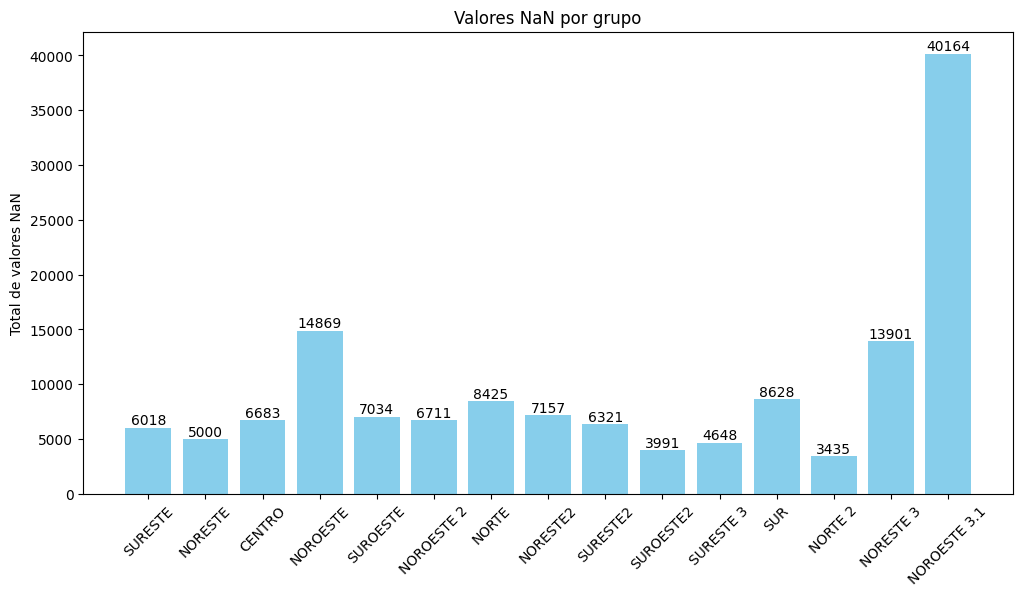

In [99]:

nombres_columnas = []
valores_vacios_totales = []

start_idx = 2
end_idx = 9

step = 7

while start_idx < len(df_aire.columns):
    columnas_indices = df_aire.iloc[:, start_idx:end_idx]

    nombre_primera_columna = df_aire.columns[start_idx]

    print(f"Observando columnas de índice {start_idx} a {end_idx}.")
    print(f"Nombre de la primera columna en este rango: {nombre_primera_columna}")
    
    total_valores_vacios = columnas_indices.isna().sum().sum()
    print(f"Total de valores vacíos en este rango: {total_valores_vacios}\n")
    print(f"Porcentaje: {total_valores_vacios/(len(df_aire) * (end_idx - start_idx))} \n")

    nombres_columnas.append(nombre_primera_columna)
    valores_vacios_totales.append(total_valores_vacios)

    
    start_idx += step
    end_idx += step

plt.figure(figsize=(12, 6))
barras = plt.bar(nombres_columnas, valores_vacios_totales, color='skyblue')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.ylabel('Total de valores NaN')
plt.title('Valores NaN por grupo')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Seleccion de zonas meteorilogicas y tipo de inversion que se quedaran para el analisis
# Definir los rangos de columnas a seleccionar
rangos = [(1, 9), (10,16), (17, 23), (52,58), (66,72), (73,79)]
df_cinco_zonas = df_aire.copy()


columnas_seleccionadas = []
for inicio, fin in rangos:
    columnas_seleccionadas.extend(df_cinco_zonas.columns[inicio-1:fin])

df_cinco_zonas = df_cinco_zonas[columnas_seleccionadas]

In [12]:
df_cinco_zonas.head()

,date,estacion,SURESTE,SURESTE.1,SURESTE.2,SURESTE.4,SURESTE.5,SURESTE.6,SURESTE.10,NORESTE,...,SUROESTE2.5,SUROESTE2.6,SUROESTE2.10,SURESTE 3,SURESTE 3.1,SURESTE 3.2,SURESTE 3.4,SURESTE 3.5,SURESTE 3.6,SURESTE 3.10
0,2022-01-01 00:00:00,Invierno,2.36,19.8,48.4,5,142,111,4,4.73,...,106,53,4.8,1.61,5.3,21.8,17,138,83,3.9
1,2022-01-01 01:00:00,Invierno,2.29,10.8,44.5,6,168,112.16,4.6,3.24,...,89,49,4.4,2.15,23.7,26.1,7,145,122,4.5
2,2022-01-01 02:00:00,Invierno,2.71,28.3,47.1,4,203,139.31,5.9,3.34,...,77,39,4.1,1.38,6.9,15,14,324,153,4.7
3,2022-01-01 03:00:00,Invierno,2.31,19.6,42.1,5,262,177.68,5.5,3.42,...,54,35,4.7,2.38,14.5,22.9,5,110,NaN,4.1
4,2022-01-01 04:00:00,Invierno,1.85,13,39.5,4,185,134.21,4.9,2.67,...,68,35,4.3,2.83,17.8,24.3,4,246,192,3.6


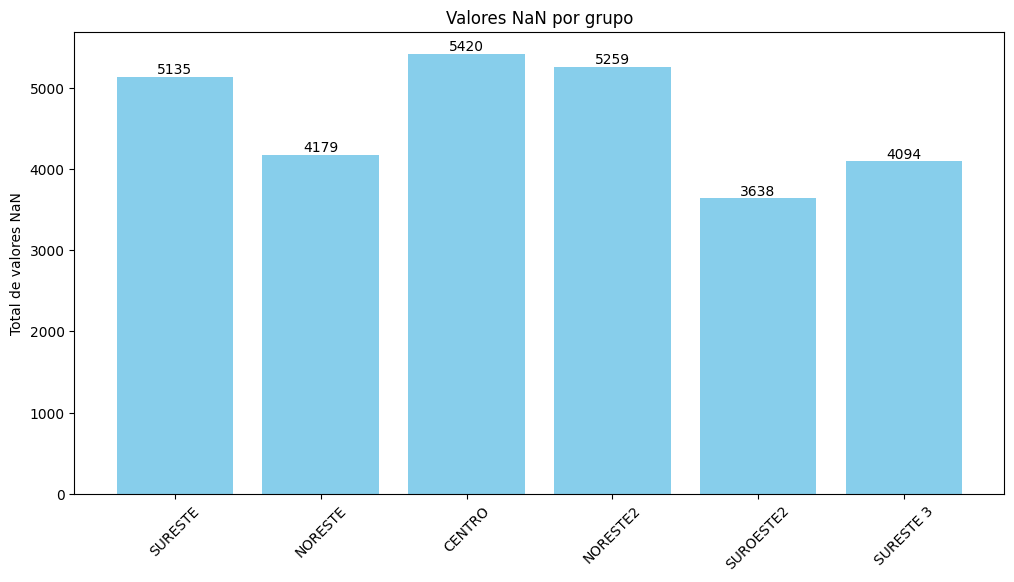

In [13]:
# Número de valores vacios en dataset
nombres_columnas = []
valores_vacios_totales = []

start_idx = 2
end_idx = 8
step = 7

while start_idx < len(df_cinco_zonas.columns):
    columnas_indices = df_cinco_zonas.iloc[:, start_idx:end_idx]
    nombre_primera_columna = df_cinco_zonas.columns[start_idx]

    total_valores_vacios = columnas_indices.isna().sum().sum()

    nombres_columnas.append(nombre_primera_columna)
    valores_vacios_totales.append(total_valores_vacios)


    start_idx += step
    end_idx += step

plt.figure(figsize=(12, 6))
barras = plt.bar(nombres_columnas, valores_vacios_totales, color='skyblue')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.ylabel('Total de valores NaN')
plt.title('Valores NaN por grupo')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Hicimos numerico todas las columnas de neustros datos
columnas_rango = df_cinco_zonas.columns[2:]

df_cinco_zonas[columnas_rango] = df_cinco_zonas[columnas_rango].apply(pd.to_numeric, errors='coerce')
df_cinco_zonas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19726 entries, 0 to 19725
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          19726 non-null  datetime64[ns]
 1   estacion      19726 non-null  object        
 2   SURESTE       19505 non-null  float64       
 3   SURESTE.1     19089 non-null  float64       
 4   SURESTE.2     19254 non-null  float64       
 5   SURESTE.4     19153 non-null  float64       
 6   SURESTE.5     19357 non-null  float64       
 7   SURESTE.6     16863 non-null  float64       
 8   SURESTE.10    18843 non-null  float64       
 9   NORESTE       19099 non-null  float64       
 10  NORESTE.1     19343 non-null  float64       
 11  NORESTE.2     19439 non-null  float64       
 12  NORESTE.4     18802 non-null  float64       
 13  NORESTE.5     19253 non-null  float64       
 14  NORESTE.6     18241 non-null  float64       
 15  NORESTE.10    18905 non-null  float6

In [15]:
# Quitar las inversiones
df_aire_cinco_zonas = df_cinco_zonas.copy()

# Renombrar las columnas usando el diccionario
column_rename = {
    'SURESTE': 'GUADALUPE.CO',
    'SURESTE.1': 'GUADALUPE.NO',
    'SURESTE.2': 'GUADALUPE.NO2',
    'SURESTE.4': 'GUADALUPE.O3',
    'SURESTE.5': 'GUADALUPE.PM10',
    'SURESTE.6': 'GUADALUPE.PM2.5',
    'SURESTE.10': 'GUADALUPE.SO2',

    'NORESTE': 'SAN NICOLAS.CO',
    'NORESTE.1': 'SAN NICOLAS.NO',
    'NORESTE.2': 'SAN NICOLAS.NO2',
    'NORESTE.4': 'SAN NICOLAS.O3',
    'NORESTE.5': 'SAN NICOLAS.PM10',
    'NORESTE.6': 'SAN NICOLAS.PM2.5',
    'NORESTE.10': 'SAN NICOLAS.SO2',

    'CENTRO': 'MTY.CO',
    'CENTRO.1': 'MTY.NO',
    'CENTRO.2': 'MTY.NO2',
    'CENTRO.4': 'MTY.O3',
    'CENTRO.5': 'MTY.PM10',
    'CENTRO.6': 'MTY.PM2.5',
    'CENTRO.10': 'MTY.SO2',

    'NORESTE2': 'APODACA.CO',
    'NORESTE2.1': 'APODACA.NO',
    'NORESTE2.2': 'APODACA.NO2',
    'NORESTE2.4': 'APODACA.O3',
    'NORESTE2.5': 'APODACA.PM10',
    'NORESTE2.6': 'APODACA.PM2.5',
    'NORESTE2.10': 'APODACA.SO2',

    'SUROESTE2': 'SAN PEDRO.CO',
    'SUROESTE2.1': 'SAN PEDRO.NO',
    'SUROESTE2.2': 'SAN PEDRO.NO2',
    'SUROESTE2.4': 'SAN PEDRO.O3',
    'SUROESTE2.5': 'SAN PEDRO.PM10',
    'SUROESTE2.6': 'SAN PEDRO.PM2.5',
    'SUROESTE2.10': 'SAN PEDRO.SO2',

    'SURESTE 3': 'CADEREYTA.CO',
    'SURESTE 3.1': 'CADEREYTA.NO',
    'SURESTE 3.2': 'CADEREYTA.NO2',
    'SURESTE 3.4': 'CADEREYTA.O3',
    'SURESTE 3.5': 'CADEREYTA.PM10',
    'SURESTE 3.6': 'CADEREYTA.PM2.5',
    'SURESTE 3.10': 'CADEREYTA.SO2',
}

df_aire_cinco_zonas.rename(columns=column_rename, inplace=True)

# Verifica si hay valores negativos en todas las columnas excepto la primera
filas_con_negativos = df_aire_cinco_zonas.iloc[:, 2:] < 0
# Encuentra las filas donde al menos una columna relevante tiene valores negativos
filas_a_eliminar = filas_con_negativos.any(axis=1)
# Filtrar el DataFrame para eliminar las filas con valores negativos
df_aire_cinco_zonas = df_aire_cinco_zonas[~filas_a_eliminar]

# Crear un DataFrame para mostrar los valores mínimos y máximos de todas las columnas excepto la primera
ranges = pd.DataFrame({'Min': df_aire_cinco_zonas.iloc[:, 2:].min(), 'Max': df_aire_cinco_zonas.iloc[:, 1:].max()})
print(ranges)

negativos_por_columna = {}

# Iterar sobre cada columna del DataFrame excepto la primera
for columna in df_aire_cinco_zonas.columns[2:]:
    # Filtrar los valores negativos en la columna actual
    valores_negativos = df_aire_cinco_zonas[df_aire_cinco_zonas[columna] < 0][columna]
    # Almacenar los valores negativos en el diccionario
    negativos_por_columna[columna] = valores_negativos

# Mostrar los resultados
for columna, valores in negativos_por_columna.items():
    print(f"Valores negativos en la columna {columna}:")
    print(valores)

df_aire_cinco_zonas.info()

                    Min     Max
APODACA.CO         0.00    7.95
APODACA.NO         0.80   284.8
APODACA.NO2        0.50   100.8
APODACA.O3         3.00   145.0
APODACA.PM10       2.00   702.0
APODACA.PM2.5      2.00   351.0
APODACA.SO2        0.50    76.8
CADEREYTA.CO       0.05    9.76
CADEREYTA.NO       0.60   370.8
CADEREYTA.NO2      0.00    85.0
CADEREYTA.O3       1.00   168.0
CADEREYTA.PM10     2.00   999.0
CADEREYTA.PM2.5    0.00   483.0
CADEREYTA.SO2      0.50   222.9
GUADALUPE.CO       0.05    4.45
GUADALUPE.NO       0.90   210.0
GUADALUPE.NO2      1.10    77.4
GUADALUPE.O3       2.00   163.0
GUADALUPE.PM10     2.00   625.0
GUADALUPE.PM2.5    2.00  177.68
GUADALUPE.SO2      0.90    42.8
MTY.CO             0.07    5.63
MTY.NO             0.50   288.4
MTY.NO2            0.40    92.2
MTY.O3             1.00   164.0
MTY.PM10           3.00   735.0
MTY.PM2.5          2.00   152.0
MTY.SO2            0.50    73.9
SAN NICOLAS.CO     0.07    15.3
SAN NICOLAS.NO     0.60   273.6
SAN NICO

#### Ingenieria de datos

In [23]:
# Función para reemplazar valores nulos por el promedio de ventana de tiempo del 10% de valores anteriores
def reemplazar_valores_faltantes(df, ventana=19725 * 0.10):
    ventana = int(ventana)  # Convertir la ventana a un entero
    # Iterar sobre todas las columnas excepto la primera
    for columna in df.columns[2:]:
        if df[columna].dtype in ['int64', 'float64']:
            while df[columna].isna().sum() > 0:
                # Calcular el promedio en la ventana de tiempo
                promedio_ventana = df[columna].rolling(window=ventana, min_periods=1).mean()
                # Reemplazar los valores nulos con el promedio de la ventana
                df[columna] = df[columna].fillna(promedio_ventana)

    return df

# Aplicar la función al DataFrame excepto la primera columna
df_aire_cinco_zonas = reemplazar_valores_faltantes(df_aire_cinco_zonas)

# Verificar si hay valores negativos en las columnas excepto la primera
negativos_por_columna = {}
for columna in df_aire_cinco_zonas.columns[2:]:
    valores_negativos = df_aire_cinco_zonas[df_aire_cinco_zonas[columna] < 0][columna]
    negativos_por_columna[columna] = valores_negativos

# Mostrar los resultados
for columna, valores in negativos_por_columna.items():
    print(f"Valores negativos en la columna {columna}:")
    print(valores)

# Información del DataFrame
df_aire_cinco_zonas.info()

Valores negativos en la columna GUADALUPE.CO:
Series([], Name: GUADALUPE.CO, dtype: float64)
Valores negativos en la columna GUADALUPE.NO:
Series([], Name: GUADALUPE.NO, dtype: float64)
Valores negativos en la columna GUADALUPE.NO2:
Series([], Name: GUADALUPE.NO2, dtype: float64)
Valores negativos en la columna GUADALUPE.O3:
Series([], Name: GUADALUPE.O3, dtype: float64)
Valores negativos en la columna GUADALUPE.PM10:
Series([], Name: GUADALUPE.PM10, dtype: float64)
Valores negativos en la columna GUADALUPE.PM2.5:
Series([], Name: GUADALUPE.PM2.5, dtype: float64)
Valores negativos en la columna GUADALUPE.SO2:
Series([], Name: GUADALUPE.SO2, dtype: float64)
Valores negativos en la columna SAN NICOLAS.CO:
Series([], Name: SAN NICOLAS.CO, dtype: float64)
Valores negativos en la columna SAN NICOLAS.NO:
Series([], Name: SAN NICOLAS.NO, dtype: float64)
Valores negativos en la columna SAN NICOLAS.NO2:
Series([], Name: SAN NICOLAS.NO2, dtype: float64)
Valores negativos en la columna SAN NICOLA

## Análisis descriptivo

In [65]:
df_analisis_descriptivo = df_aire_cinco_zonas.copy()
df_analisis_descriptivo.head()

,date,estacion,GUADALUPE.CO,GUADALUPE.NO,GUADALUPE.NO2,GUADALUPE.O3,GUADALUPE.PM10,GUADALUPE.PM2.5,GUADALUPE.SO2,SAN NICOLAS.CO,...,SAN PEDRO.PM10,SAN PEDRO.PM2.5,SAN PEDRO.SO2,CADEREYTA.CO,CADEREYTA.NO,CADEREYTA.NO2,CADEREYTA.O3,CADEREYTA.PM10,CADEREYTA.PM2.5,CADEREYTA.SO2
0,2022-01-01 00:00:00,Invierno,2.36,19.8,48.4,5.0,142.0,111.00,4.0,4.73,...,106.0,53.0,4.8,1.61,5.3,21.8,17.0,138.0,83.000000,3.9
1,2022-01-01 01:00:00,Invierno,2.29,10.8,44.5,6.0,168.0,112.16,4.6,3.24,...,89.0,49.0,4.4,2.15,23.7,26.1,7.0,145.0,122.000000,4.5
2,2022-01-01 02:00:00,Invierno,2.71,28.3,47.1,4.0,203.0,139.31,5.9,3.34,...,77.0,39.0,4.1,1.38,6.9,15.0,14.0,324.0,153.000000,4.7
3,2022-01-01 03:00:00,Invierno,2.31,19.6,42.1,5.0,262.0,177.68,5.5,3.42,...,54.0,35.0,4.7,2.38,14.5,22.9,5.0,110.0,119.333333,4.1
4,2022-01-01 04:00:00,Invierno,1.85,13.0,39.5,4.0,185.0,134.21,4.9,2.67,...,68.0,35.0,4.3,2.83,17.8,24.3,4.0,246.0,192.000000,3.6


In [62]:
# Asumiendo que df_analisis_descriptivo es tu DataFrame
resultados_anderson = {}

# Iterar sobre todas las columnas excepto la primera
for column in df_analisis_descriptivo.columns[2:]:
    anderson_test = stats.anderson(df_analisis_descriptivo[column], dist='norm')
    resultados_anderson[column] = {
        'Estadístico': anderson_test.statistic,
        'Valores Críticos': anderson_test.critical_values,
        'Nivel de Significancia': anderson_test.significance_level
    }
    print(f"Columna: {column}")
    print(f"Estadístico de Anderson-Darling: {anderson_test.statistic}")
    for sl, cv in zip(anderson_test.significance_level, anderson_test.critical_values):
        if anderson_test.statistic < cv:
            print(f"No se rechaza la hipótesis nula en el nivel de significancia {sl}%, los datos siguen una distribución normal.\n")
        else:
            print(f"Se rechaza la hipótesis nula en el nivel de significancia {sl}%, los datos no siguen una distribución normal.\n")

# Opcional: convertir resultados en un DataFrame para mejor visualización
df_analisis_descriptivo_pruebas = pd.DataFrame(resultados_anderson).T
print(df_analisis_descriptivo_pruebas)

Columna: GUADALUPE.CO
Estadístico de Anderson-Darling: 72.47286962786166
Se rechaza la hipótesis nula en el nivel de significancia 15.0%, los datos no siguen una distribución normal.

Se rechaza la hipótesis nula en el nivel de significancia 10.0%, los datos no siguen una distribución normal.

Se rechaza la hipótesis nula en el nivel de significancia 5.0%, los datos no siguen una distribución normal.

Se rechaza la hipótesis nula en el nivel de significancia 2.5%, los datos no siguen una distribución normal.

Se rechaza la hipótesis nula en el nivel de significancia 1.0%, los datos no siguen una distribución normal.

Columna: GUADALUPE.NO
Estadístico de Anderson-Darling: 2972.2915689524743
Se rechaza la hipótesis nula en el nivel de significancia 15.0%, los datos no siguen una distribución normal.

Se rechaza la hipótesis nula en el nivel de significancia 10.0%, los datos no siguen una distribución normal.

Se rechaza la hipótesis nula en el nivel de significancia 5.0%, los datos no si

In [66]:
# Crear un nuevo dataframe sin los datos extremos
df_analisis_descriptivo = df_analisis_descriptivo.copy()


# Obtener el valor mínimo en todo el DataFrame excepto la primera columna
min_value = df_analisis_descriptivo.iloc[:, 2:].min().min()

# Si el valor mínimo es menor o igual a 0, ajustar los valores para que sean todos positivos
if min_value <= 0:
    df_filtered = df_analisis_descriptivo.iloc[:, 2:] - min_value + 1
else:
    df_filtered = df_analisis_descriptivo.iloc[:, 2:].copy()

# Crear un DataFrame vacío para almacenar los datos transformados
df_transformed = pd.DataFrame()

# Aplicar la transformación Box-Cox a cada columna excepto la primera
for columna in df_filtered.columns:
    # Aplicar Box-Cox y capturar el valor del parámetro lambda
    transformed_data, lambda_value = boxcox(df_filtered[columna])
    df_transformed[columna] = transformed_data

# Mantener las 2 primeras columnas intacta y asignar las columnas transformadas de nuevo a df_analisis_descriptivo
df_analisis_descriptivo = pd.concat([df_analisis_descriptivo.iloc[:, :2], df_transformed], axis=1)

# Mostrar la información del DataFrame transformado
df_analisis_descriptivo = df_analisis_descriptivo.drop(index= 5070)
print(df_analisis_descriptivo.info())



<class 'pandas.core.frame.DataFrame'>
Index: 19725 entries, 0 to 19725
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19725 non-null  datetime64[ns]
 1   estacion           19725 non-null  object        
 2   GUADALUPE.CO       19724 non-null  float64       
 3   GUADALUPE.NO       19724 non-null  float64       
 4   GUADALUPE.NO2      19724 non-null  float64       
 5   GUADALUPE.O3       19724 non-null  float64       
 6   GUADALUPE.PM10     19724 non-null  float64       
 7   GUADALUPE.PM2.5    19724 non-null  float64       
 8   GUADALUPE.SO2      19724 non-null  float64       
 9   SAN NICOLAS.CO     19724 non-null  float64       
 10  SAN NICOLAS.NO     19724 non-null  float64       
 11  SAN NICOLAS.NO2    19724 non-null  float64       
 12  SAN NICOLAS.O3     19724 non-null  float64       
 13  SAN NICOLAS.PM10   19724 non-null  float64       
 14  SAN NICOLAS

In [67]:
# Seleccionar todas las columnas excepto las dos primeras (categóricas)
columnas_a_filtrar = df_analisis_descriptivo.columns[2:]

# Calcular los cuartiles solo para las columnas seleccionadas
Q1 = df_analisis_descriptivo[columnas_a_filtrar].quantile(0.25)
Q2 = df_analisis_descriptivo[columnas_a_filtrar].quantile(0.5)
Q3 = df_analisis_descriptivo[columnas_a_filtrar].quantile(0.75)
Q4 = df_analisis_descriptivo[columnas_a_filtrar].quantile(1)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites superior e inferior usando 3 * IQR
upper_limit = Q3 + 3 * IQR
lower_limit = Q1 - 3 * IQR

# Filtrar las filas del DataFrame: conservar solo las filas donde todos los valores estén dentro de los límites
condicion_filas_validas = (df_analisis_descriptivo[columnas_a_filtrar] >= lower_limit) & (df_analisis_descriptivo[columnas_a_filtrar] <= upper_limit)

# Queremos eliminar las filas que tengan algún valor fuera del rango permitido en cualquiera de las columnas numéricas
# Por eso usamos .all(axis=1) para asegurarnos que todas las condiciones por fila se cumplan
filas_sin_outliers = condicion_filas_validas.all(axis=1)

# Filtrar el DataFrame original, manteniendo las primeras dos columnas y eliminando las filas con outliers
df_analisis_descriptivo_filtrado = df_analisis_descriptivo[filas_sin_outliers]


# Mostrar la información del DataFrame resultante para verificar el resultado
df_analisis_descriptivo_filtrado.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19479 entries, 1 to 19724
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19479 non-null  datetime64[ns]
 1   estacion           19479 non-null  object        
 2   GUADALUPE.CO       19479 non-null  float64       
 3   GUADALUPE.NO       19479 non-null  float64       
 4   GUADALUPE.NO2      19479 non-null  float64       
 5   GUADALUPE.O3       19479 non-null  float64       
 6   GUADALUPE.PM10     19479 non-null  float64       
 7   GUADALUPE.PM2.5    19479 non-null  float64       
 8   GUADALUPE.SO2      19479 non-null  float64       
 9   SAN NICOLAS.CO     19479 non-null  float64       
 10  SAN NICOLAS.NO     19479 non-null  float64       
 11  SAN NICOLAS.NO2    19479 non-null  float64       
 12  SAN NICOLAS.O3     19479 non-null  float64       
 13  SAN NICOLAS.PM10   19479 non-null  float64       
 14  SAN NICOLAS

In [107]:
# Crear una copia del DataFrame filtrado (asegúrate de que el filtrado ya se haya aplicado correctamente)
df_standardized = df_analisis_descriptivo_filtrado.copy()

# Separar las columnas 'date' y 'estacion' del resto de los datos numéricos
# Asegúrate de que las columnas 'date' y 'estacion' tengan las mismas filas que los datos numéricos
date_estacion_cols = df_standardized[['date', 'estacion']].copy()
numeric_cols = df_standardized.drop(columns=['date', 'estacion'])

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Estandarizar solo las columnas numéricas
scaled_numeric_cols = scaler.fit_transform(numeric_cols)

# Convertir las columnas escaladas a un DataFrame y restaurar los nombres originales
df_scaled_numeric = pd.DataFrame(scaled_numeric_cols, columns=numeric_cols.columns, index=numeric_cols.index)

# Concatenar las columnas 'date' y 'estacion' con los datos estandarizados
df_standardized = pd.concat([date_estacion_cols, df_scaled_numeric], axis=1)

# Mostrar la información del DataFrame estandarizado para verificar que los tamaños coincidan
print(df_standardized.info())

# Asignar el DataFrame estandarizado de nuevo a df_analisis_descriptivo
df_analisis_descriptivo = df_standardized


<class 'pandas.core.frame.DataFrame'>
Index: 19479 entries, 1 to 19724
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19479 non-null  datetime64[ns]
 1   estacion           19479 non-null  object        
 2   GUADALUPE.CO       19479 non-null  float64       
 3   GUADALUPE.NO       19479 non-null  float64       
 4   GUADALUPE.NO2      19479 non-null  float64       
 5   GUADALUPE.O3       19479 non-null  float64       
 6   GUADALUPE.PM10     19479 non-null  float64       
 7   GUADALUPE.PM2.5    19479 non-null  float64       
 8   GUADALUPE.SO2      19479 non-null  float64       
 9   SAN NICOLAS.CO     19479 non-null  float64       
 10  SAN NICOLAS.NO     19479 non-null  float64       
 11  SAN NICOLAS.NO2    19479 non-null  float64       
 12  SAN NICOLAS.O3     19479 non-null  float64       
 13  SAN NICOLAS.PM10   19479 non-null  float64       
 14  SAN NICOLAS

In [109]:
# Funcion de graficas de analisis
def analyze_dataframe(df):
    for col in df.columns:
        print(f'\nAnálisis para la columna: {col}')

        if pd.api.types.is_numeric_dtype(df[col]):
            print('\nMedidas Estadísticas Cuantitativas:')
            mean = df[col].mean()
            median = df[col].median()
            mode = df[col].mode().iloc[0]
            range_ = df[col].max() - df[col].min()
            variance = df[col].var()
            std_dev = df[col].std()
            min_value = df[col].min()
            max_value = df[col].max()

            print(f'Promedio: {mean}')
            print(f'Mediana: {median}')
            print(f'Moda: {mode}')
            print(f'Rango: {range_}')
            print(f'Varianza: {variance}')
            print(f'Desviación Estándar: {std_dev}')
            print(f'Mínimo: {min_value}')
            print(f'Máximo: {max_value}')

            fig, axs = plt.subplots(1, 2, figsize=(16, 6))

            sns.boxplot(x=df[col], ax=axs[0])
            axs[0].set_title(f'Boxplot de {col}')

            sns.histplot(df[col], bins=30, kde=True, ax=axs[1])
            axs[1].set_title(f'Histograma de {col}')

            plt.show()

        elif pd.api.types.is_object_dtype(df[col]):
            print('\nMedidas Estadísticas Cualitativas:')
            frequency_distribution = df[col].value_counts()
            print(f'Distribución de Frecuencia:\n{frequency_distribution}')

            fig, axs = plt.subplots(1, 2, figsize=(16, 6))

            sns.countplot(x=df[col], ax=axs[0])
            axs[0].set_title(f'Diagrama de Barras de {col}')

            df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axs[1])
            axs[1].set_title(f'Diagrama de Pastel de {col}')
            axs[1].set_ylabel('')

            plt.show()

        else:
            print(f'Columna {col} no es ni cuantitativa ni cualitativa.')

#analyze_dataframe(df_standardized)


In [110]:
def pruebas_normalidad(df):

    resultados = {}
    
    # Iterar sobre todas las columnas excepto la primera
    for columna in df.columns[2:]:
        stat, p_value = shapiro(df[columna].dropna())  # Eliminar valores NaN antes de la prueba
        resultados[columna] = {'Estadístico': stat, 'p-valor': p_value}
    
    resultados_df = pd.DataFrame(resultados).T
    
    # Agregar interpretación
    resultados_df['Normalidad'] = resultados_df['p-valor'].apply(lambda p: 'No Rechaza H0 (Normal)' if p > 0.10 else 'Rechaza H0 (No Normal)')
    
    return resultados_df

# Aplicar la función al DataFrame df_standardized
resultados_normalidad = pruebas_normalidad(df_standardized)
print(resultados_normalidad)


                   Estadístico       p-valor              Normalidad
GUADALUPE.CO          0.990891  4.837907e-33  Rechaza H0 (No Normal)
GUADALUPE.NO          0.955756  1.868281e-59  Rechaza H0 (No Normal)
GUADALUPE.NO2         0.992270  9.317352e-31  Rechaza H0 (No Normal)
GUADALUPE.O3          0.990657  2.110645e-33  Rechaza H0 (No Normal)
GUADALUPE.PM10        0.998129  1.381592e-14  Rechaza H0 (No Normal)
GUADALUPE.PM2.5       0.997330  4.880346e-18  Rechaza H0 (No Normal)
GUADALUPE.SO2         0.996815  6.710063e-20  Rechaza H0 (No Normal)
SAN NICOLAS.CO        0.965020  5.060313e-55  Rechaza H0 (No Normal)
SAN NICOLAS.NO        0.983961  1.405983e-41  Rechaza H0 (No Normal)
SAN NICOLAS.NO2       0.993161  4.155971e-29  Rechaza H0 (No Normal)
SAN NICOLAS.O3        0.995669  2.224074e-23  Rechaza H0 (No Normal)
SAN NICOLAS.PM10      0.996894  1.250323e-19  Rechaza H0 (No Normal)
SAN NICOLAS.PM2.5     0.997276  3.029712e-18  Rechaza H0 (No Normal)
SAN NICOLAS.SO2       0.998159  1.

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19479.
  res = hypotest_fun_out(*samples, **kwds)


In [111]:
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19479 entries, 1 to 19724
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19479 non-null  datetime64[ns]
 1   estacion           19479 non-null  object        
 2   GUADALUPE.CO       19479 non-null  float64       
 3   GUADALUPE.NO       19479 non-null  float64       
 4   GUADALUPE.NO2      19479 non-null  float64       
 5   GUADALUPE.O3       19479 non-null  float64       
 6   GUADALUPE.PM10     19479 non-null  float64       
 7   GUADALUPE.PM2.5    19479 non-null  float64       
 8   GUADALUPE.SO2      19479 non-null  float64       
 9   SAN NICOLAS.CO     19479 non-null  float64       
 10  SAN NICOLAS.NO     19479 non-null  float64       
 11  SAN NICOLAS.NO2    19479 non-null  float64       
 12  SAN NICOLAS.O3     19479 non-null  float64       
 13  SAN NICOLAS.PM10   19479 non-null  float64       
 14  SAN NICOLAS

## Separación de datasets en zonas


In [112]:
# Separar los datos por zona

columnas_gudalupe = ['date','estacion','GUADALUPE.CO', 'GUADALUPE.NO', 'GUADALUPE.NO2', 'GUADALUPE.O3', 'GUADALUPE.PM10', 'GUADALUPE.PM2.5', 'GUADALUPE.SO2']
columnas_san_nicolas = ['date','estacion','SAN NICOLAS.CO', 'SAN NICOLAS.NO', 'SAN NICOLAS.NO2', 'SAN NICOLAS.O3', 'SAN NICOLAS.PM10', 'SAN NICOLAS.PM2.5', 'SAN NICOLAS.SO2']
columnas_mty= ['date','estacion','MTY.CO', 'MTY.NO', 'MTY.NO2', 'MTY.O3', 'MTY.PM10', 'MTY.PM2.5', 'MTY.SO2']
columnas_apodaca= ['date','estacion','APODACA.CO', 'APODACA.NO', 'APODACA.NO2', 'APODACA.O3', 'APODACA.PM10', 'APODACA.PM2.5', 'APODACA.SO2']
columnas_san_pedro= ['date','estacion','SAN PEDRO.CO', 'SAN PEDRO.NO', 'SAN PEDRO.NO2', 'SAN PEDRO.O3', 'SAN PEDRO.PM10', 'SAN PEDRO.PM2.5', 'SAN PEDRO.SO2']
columnas_cadereyta= ['date','estacion','CADEREYTA.CO', 'CADEREYTA.NO', 'CADEREYTA.NO2', 'CADEREYTA.O3', 'CADEREYTA.PM10', 'CADEREYTA.PM2.5', 'CADEREYTA.SO2']


df_guadalupe = df_standardized[columnas_gudalupe]
df_san_nicolas = df_standardized[columnas_san_nicolas]
df_mty = df_standardized[columnas_mty]
df_apodaca = df_standardized[columnas_apodaca]
df_san_pedro = df_standardized[columnas_san_pedro]
df_cadereyta= df_standardized[columnas_cadereyta]

# Series de tiempo


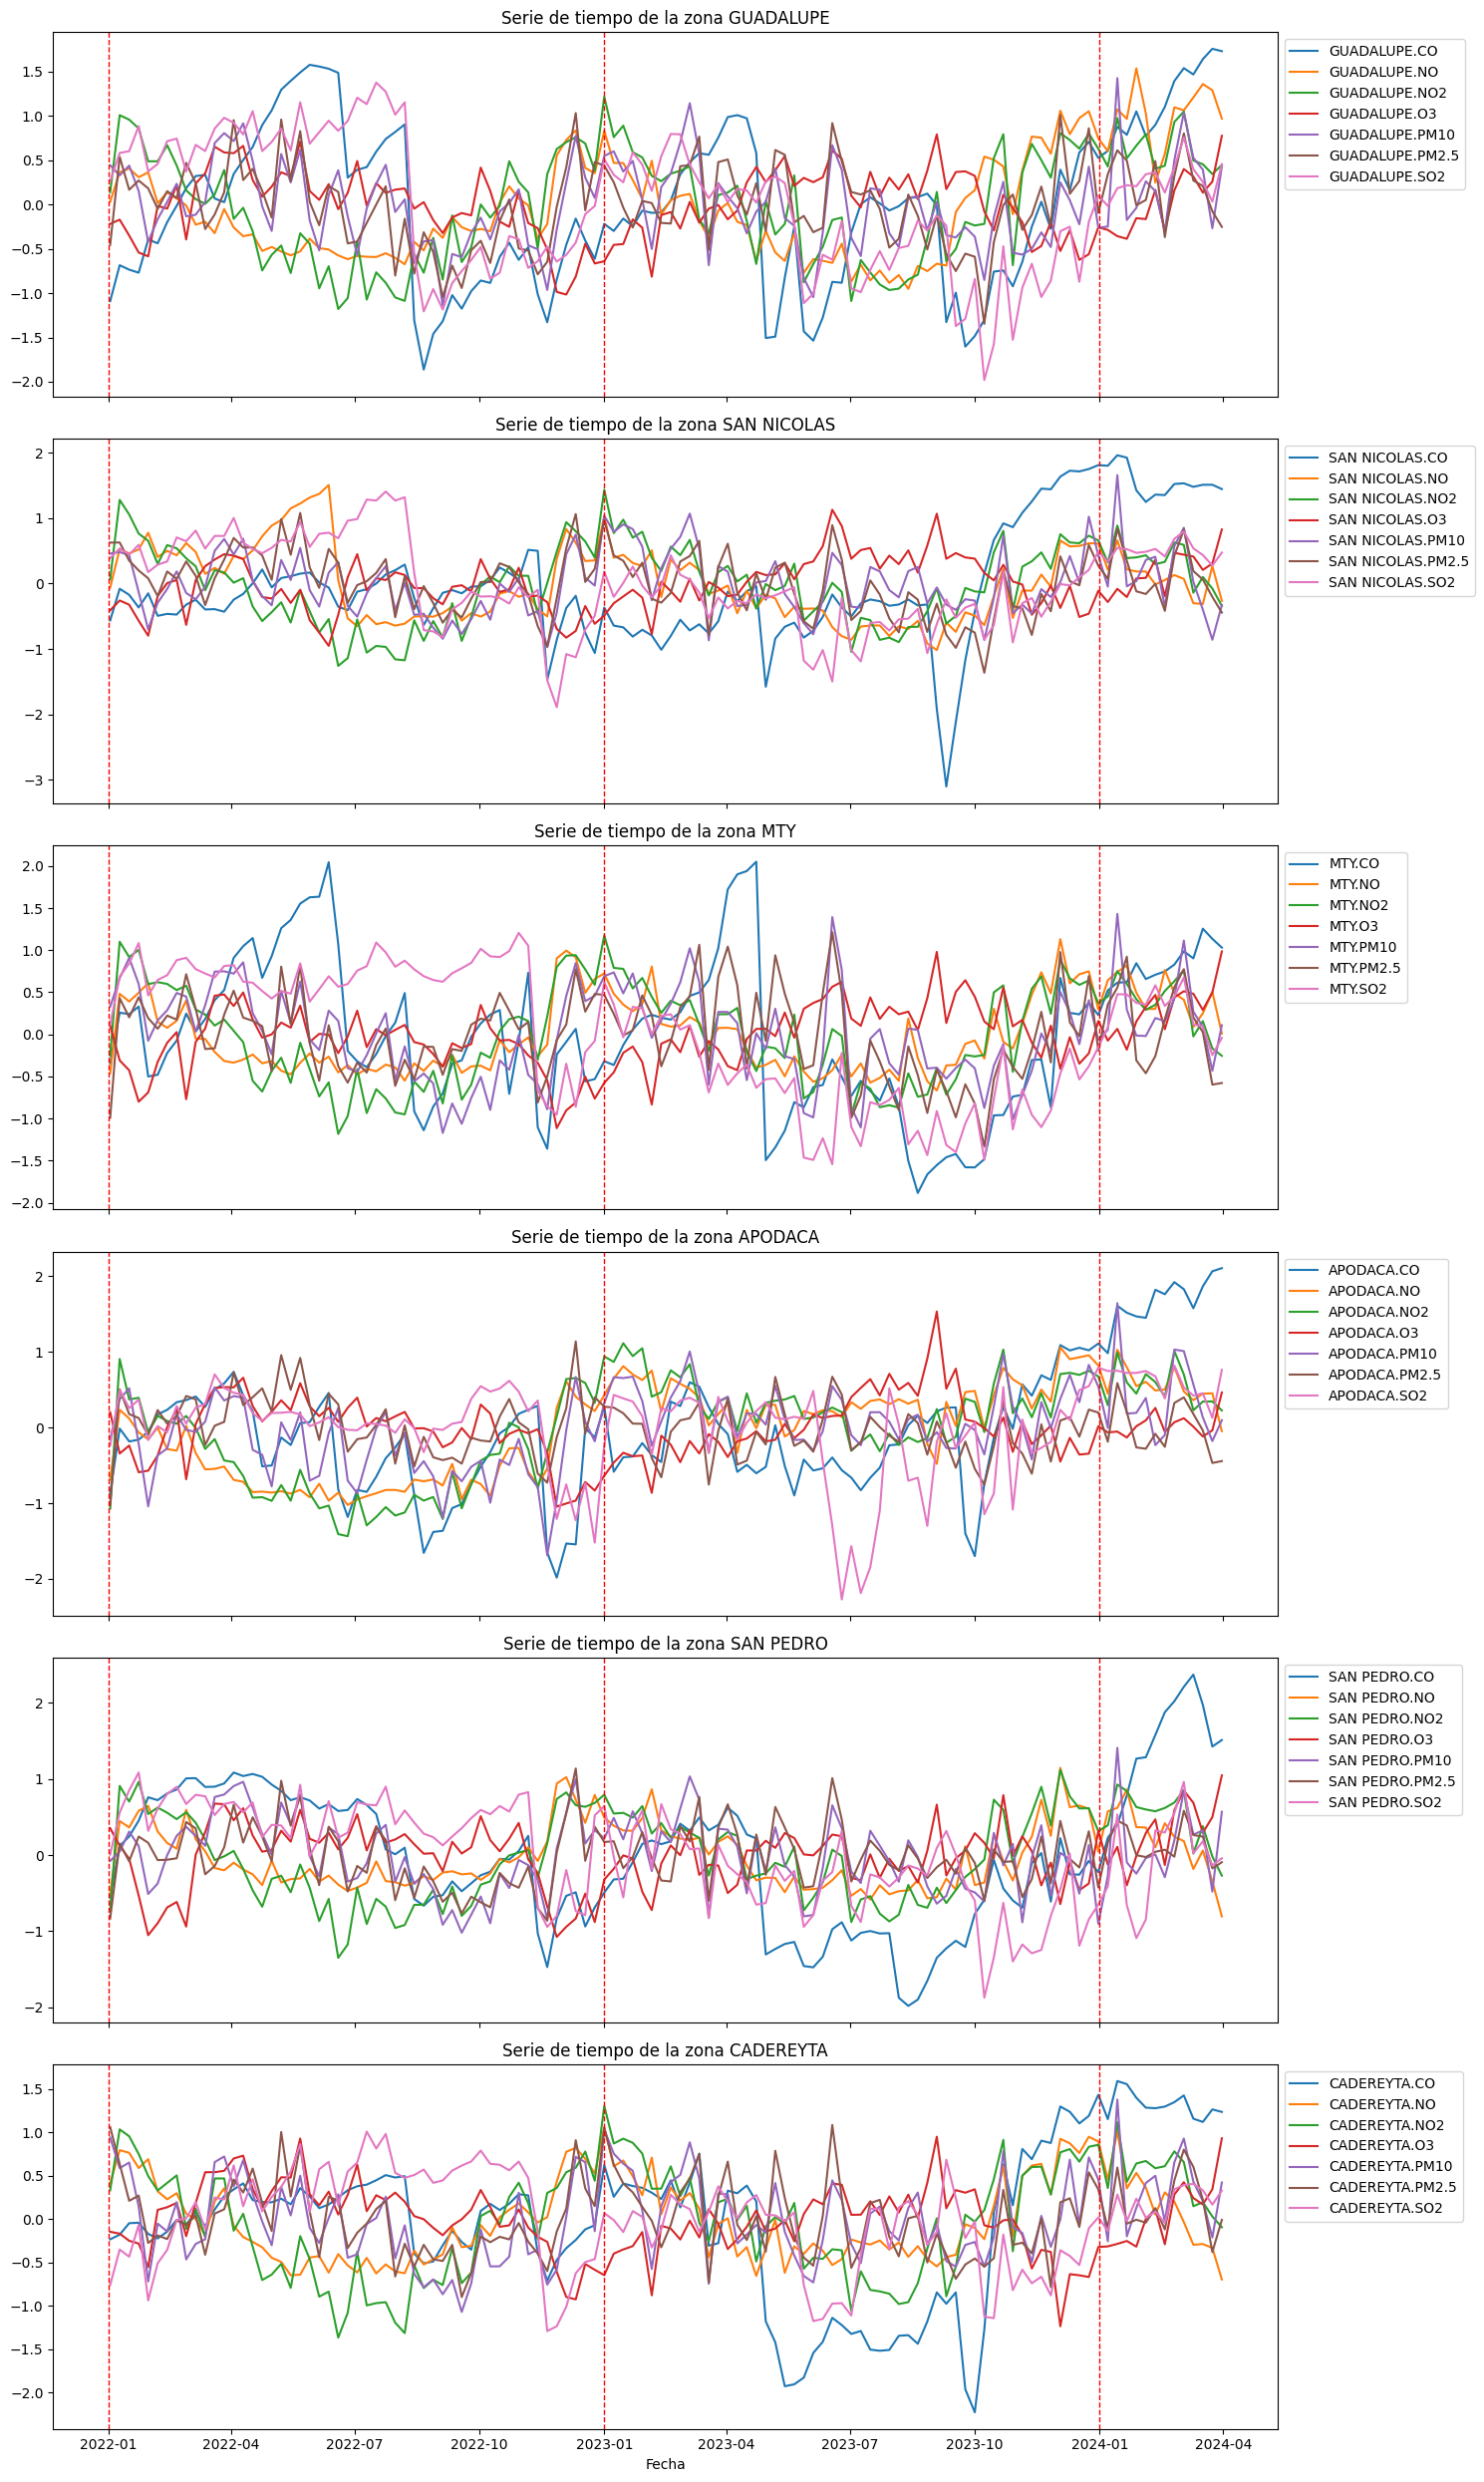

In [115]:
df = df_standardized.copy()
df = df.drop(columns="estacion")

# Supongamos que df es tu DataFrame y 'date' es la columna de fecha
df['date'] = pd.to_datetime(df['date'])

# Convertimos la columna 'date' en el índice del DataFrame
df.set_index('date', inplace=True)

# Calculamos el promedio diario y semanal para cada columna
df_daily_mean = df.resample('D').mean()
df_weekly_mean = df.resample('W').mean()

# Graficamos las series de tiempo para las columnas 1 a 7, 8 a 14, ..., 35 a 41
fig, axs = plt.subplots(6, 1, figsize=(15, 25), sharex=True)

for i in range(6):
    start_col = i * 7
    end_col = start_col + 7
    
    # Extraemos el nombre de la zona de la primera columna
    zone_name = df_weekly_mean.columns[start_col].split('.')[0]
    
    axs[i].plot(df_weekly_mean.iloc[:, start_col:end_col])
    axs[i].set_title(f'Serie de tiempo de la zona {zone_name}')
    axs[i].legend(df_weekly_mean.columns[start_col:end_col], loc='upper left', bbox_to_anchor=(1, 1))
    
    # Añadimos líneas verticales para marcar el cambio de año
    for year in df_weekly_mean.index.year.unique():
        axs[i].axvline(pd.Timestamp(f'{year}-01-01'), color='red', linestyle='--', lw=1)

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

Observando las series de tiempo vemos que el que tiene mayor estacionalidad es el de la zona #### por lo que haremos uso de este para análisar sus factores por cada una de las estaciones.



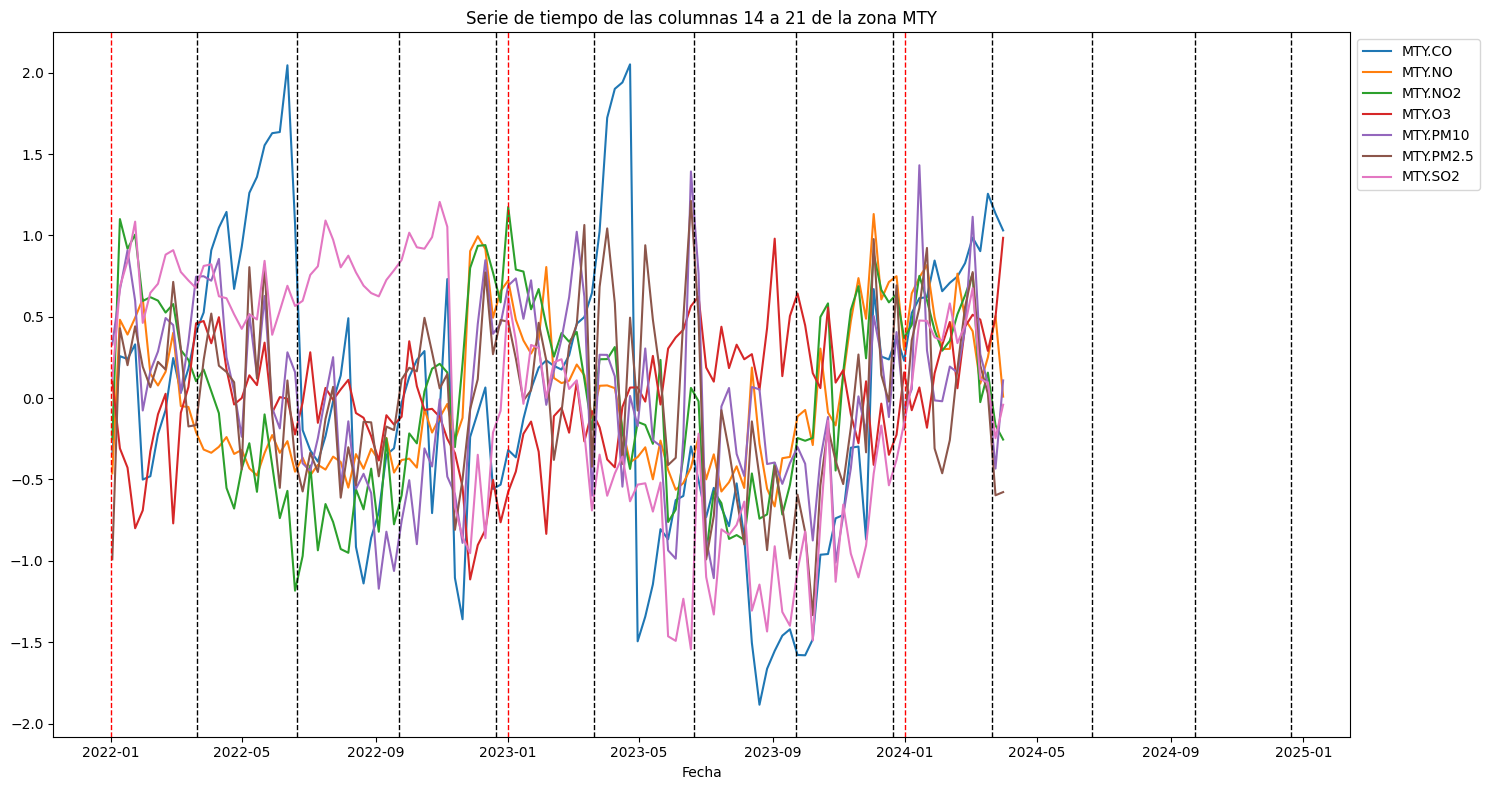

In [164]:
# Supongamos que df es tu DataFrame y 'date' es la columna de fecha
df = df_standardized.copy()
df = df.drop(columns="estacion")

# Convertimos la columna 'date' en el índice del DataFrame
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Calculamos el promedio diario y semanal para las columnas de interés (14 a 21)
df_daily_mean = df.iloc[:, 14:21].resample('D').mean()  # Columnas 14 a 21
df_weekly_mean = df.iloc[:, 14:21].resample('W').mean()  # Columnas 14 a 21

# Graficamos la serie de tiempo para las columnas 14 a 21
fig, ax = plt.subplots(figsize=(15, 8))

# Extraemos el nombre de la zona de la primera columna (columna 14)
zone_name = df_weekly_mean.columns[0].split('.')[0]

# Graficamos las columnas 14 a 21
ax.plot(df_weekly_mean)

# Configuramos el título y la leyenda
ax.set_title(f'Serie de tiempo de las columnas 14 a 21 de la zona {zone_name}')
ax.legend(df_weekly_mean.columns, loc='upper left', bbox_to_anchor=(1, 1))

# Definimos las fechas aproximadas para las estaciones
for year in df_weekly_mean.index.year.unique():
    # Fechas aproximadas para las estaciones
    primavera_inicio = pd.Timestamp(f'{year}-03-21')
    verano_inicio = pd.Timestamp(f'{year}-06-21')
    otono_inicio = pd.Timestamp(f'{year}-09-23')
    invierno_inicio = pd.Timestamp(f'{year}-12-21')
    
    # Añadimos líneas verticales para marcar las estaciones
    ax.axvline(primavera_inicio, color='black', linestyle='--', lw=1, label="Primavera")
    ax.axvline(verano_inicio, color='black', linestyle='--', lw=1, label="Verano")
    ax.axvline(otono_inicio, color='black', linestyle='--', lw=1, label="Otoño")
    ax.axvline(invierno_inicio, color='black', linestyle='--', lw=1, label="Invierno")

# Añadimos líneas verticales para marcar el cambio de año
for year in df_weekly_mean.index.year.unique():
    ax.axvline(pd.Timestamp(f'{year}-01-01'), color='red', linestyle='--', lw=1, label="Inicio de Año")

# Etiqueta para el eje X
plt.xlabel('Fecha')

# Ajuste del layout
plt.tight_layout()
plt.show()


In [116]:
# SSeparando los Data Frames según sus estaciones:

def separar_df (df):
    df_primavera = df[df['estacion'] == 'Primavera']
    df_verano = df[df['estacion'] == 'Verano']
    df_otono = df[df['estacion'] == 'Otoño']
    df_invierno = df[df['estacion'] == 'Invierno']
    return df_primavera, df_verano, df_otono, df_invierno



# Análisis factorial
### Función para realizar el análisis factorial 


In [146]:
# Función para realizar el análisis factorial
def realizar_analisis_factorial(df, n_factors= 4):
    df_scaled = df
    
    kmo_all, kmo_model = calculate_kmo(df_scaled)
    print(f"KMO para las variables: {kmo_all}\nKMO general: {kmo_model}\n")
    
    if kmo_model < 0.6:
        print("KMO es bajo. El análisis factorial puede no ser adecuado para estos datos.")
        return None, None
    else:
        print('KMO es alto, por tanto el análisis factorial es posible')

    fa = FactorAnalyzer(n_factors=n_factors, rotation='quartimax')
    fa.fit(df_scaled)

    loadings = pd.DataFrame(fa.loadings_, index=df.columns)
    variance = pd.DataFrame(fa.get_factor_variance(), 
                            index=['Varianza explicada', 'Proporción de varianza', 'Varianza acumulada'])
    return loadings, variance

## Análisis factorial por estaciones para la zona de Monterrey



In [147]:
primavera_mty, verano_mty, otono_mty, invierno_mty = separar_df(df_mty)


# Análisis factorial para primavera
loadings_primavera, variance_primavera = realizar_analisis_factorial(primavera_mty.iloc[:,2:])

# Análisis factorial para verano
loadings_verano, variance_verano = realizar_analisis_factorial(verano_mty.iloc[:,2:])

# Análisis factorial para otoño
loadings_otono, variance_otono = realizar_analisis_factorial(otono_mty.iloc[:,2:])

# Análisis factorial para Invierno
loadings_invierno, variance_invierno = realizar_analisis_factorial(invierno_mty.iloc[:,2:])


KMO para las variables: [0.55263715 0.69280351 0.69306635 0.51328992 0.59723651 0.59227182
 0.50523717]
KMO general: 0.6059731046790955

KMO es alto, por tanto el análisis factorial es posible
KMO para las variables: [0.63210665 0.67627878 0.73781573 0.48943404 0.65617605 0.71289703
 0.56059516]
KMO general: 0.6612212384340077

KMO es alto, por tanto el análisis factorial es posible
KMO para las variables: [0.74697963 0.80511828 0.81173297 0.60880543 0.73454034 0.80410932
 0.63972401]
KMO general: 0.7600655642380583

KMO es alto, por tanto el análisis factorial es posible
KMO para las variables: [0.72633363 0.8588028  0.77549238 0.4936559  0.76729333 0.81827891
 0.71333886]
KMO general: 0.7563290907370169

KMO es alto, por tanto el análisis factorial es posible


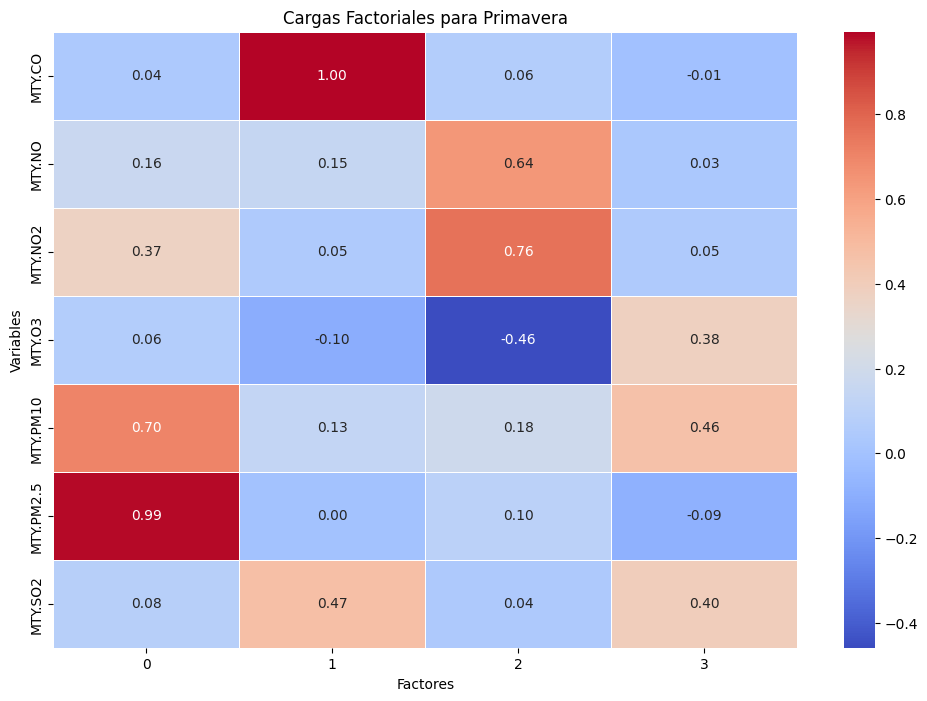

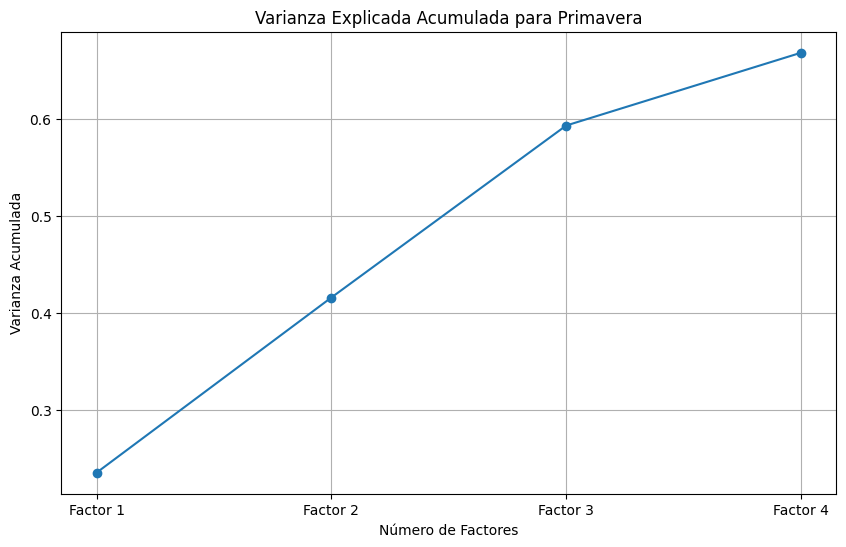

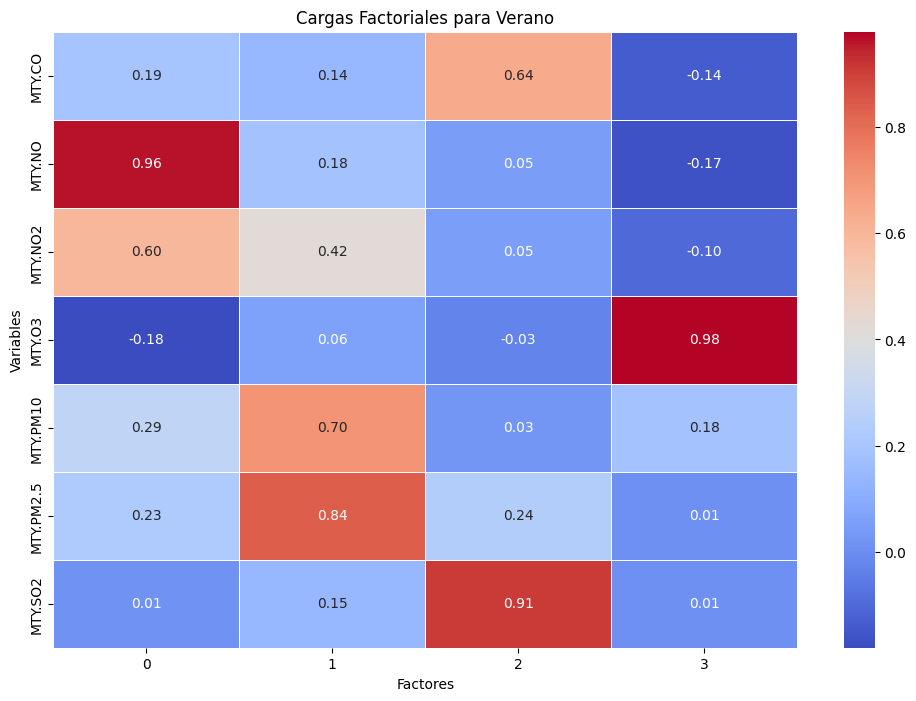

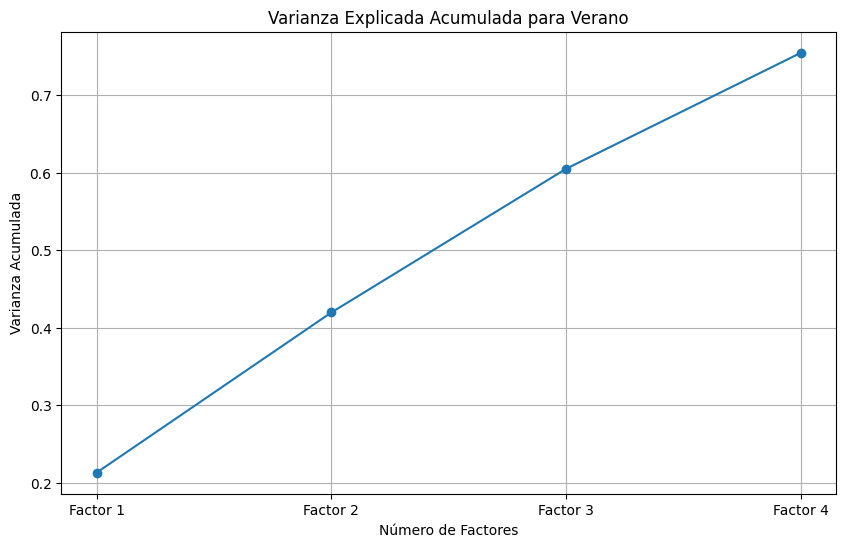

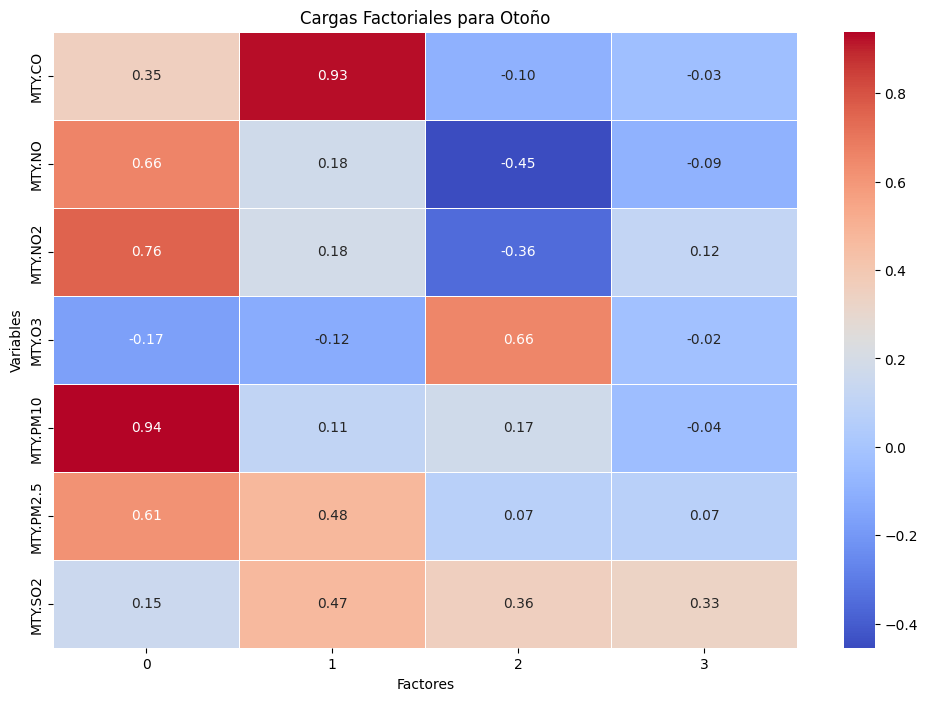

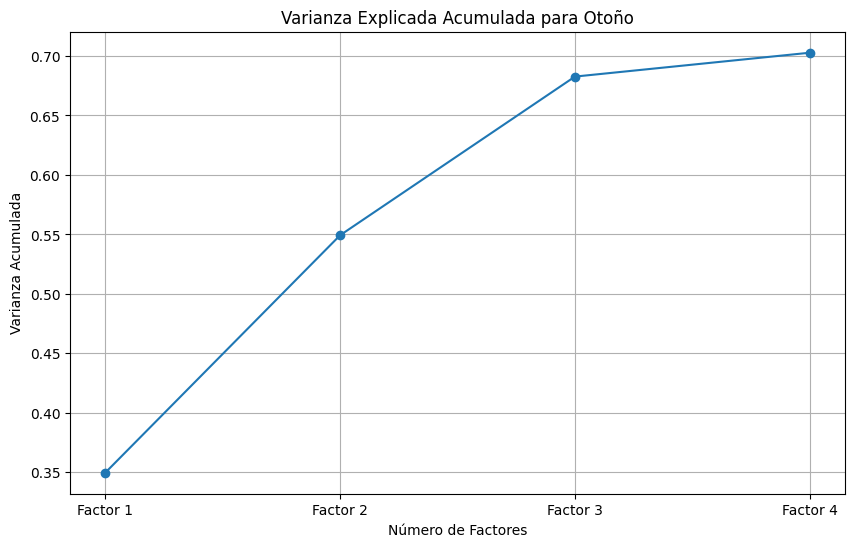

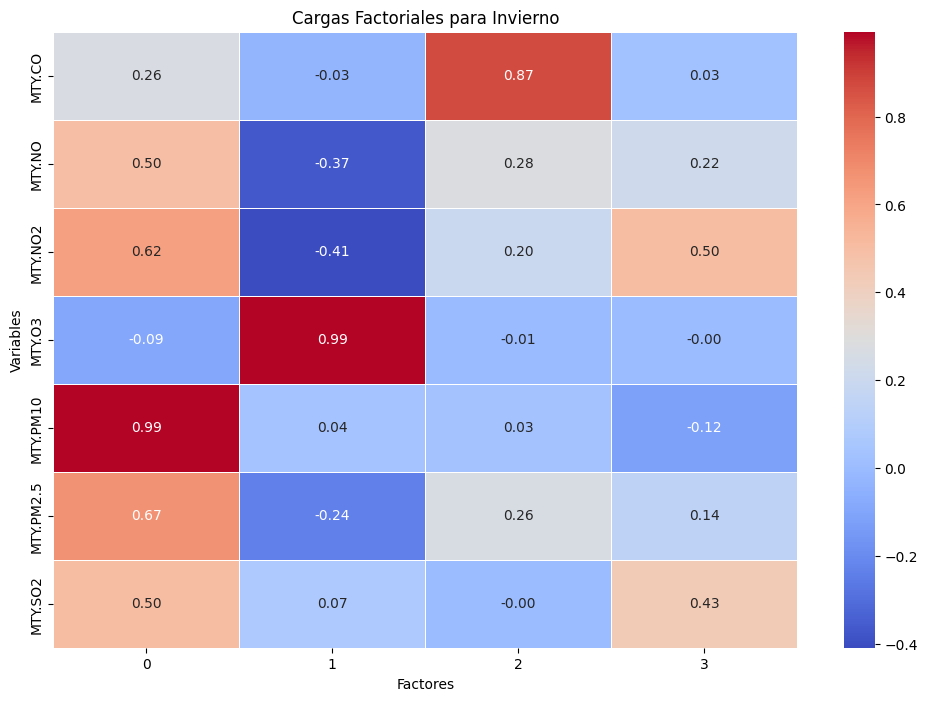

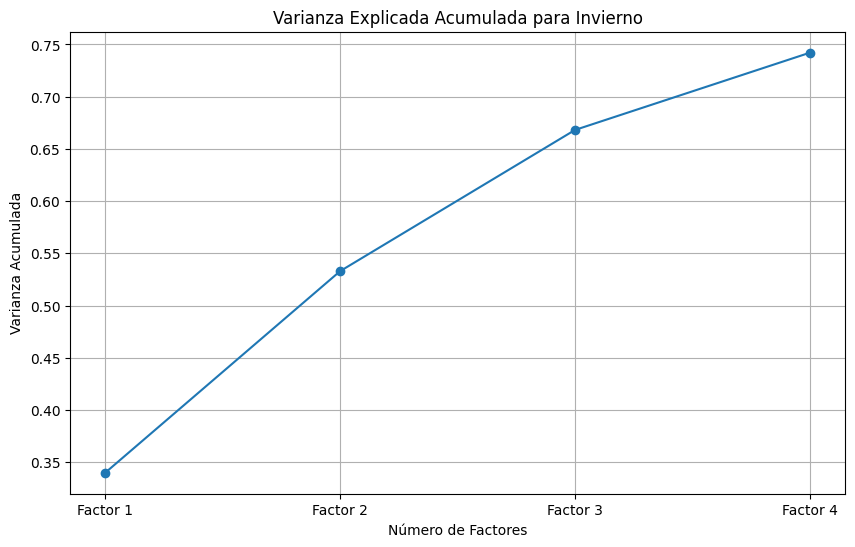

In [148]:
def graficar_cargas_factoriales(loadings, zona):
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Cargas Factoriales para {zona}')
    plt.xlabel('Factores')
    plt.ylabel('Variables')
    plt.show()

def graficar_varianza_explicada(variance, zona):
    plt.figure(figsize=(10, 6))
    plt.plot(variance.loc['Varianza acumulada'], marker='o')
    plt.title(f'Varianza Explicada Acumulada para {zona}')
    plt.xlabel('Número de Factores')
    plt.ylabel('Varianza Acumulada')
    plt.xticks(range(len(variance.columns)), [f'Factor {i+1}' for i in range(len(variance.columns))])
    plt.grid(True)
    plt.show()-

# Gráficas para Primaver
if loadings_primavera is not None:
    graficar_cargas_factoriales(loadings_primavera, 'Primavera')
    graficar_varianza_explicada(variance_primavera, 'Primavera')

# Gráficas para verano
if loadings_verano is not None:
    graficar_cargas_factoriales(loadings_verano, 'Verano')
    graficar_varianza_explicada(variance_verano, 'Verano')

# Gráficas para Otoño
if loadings_otono is not None:
    graficar_cargas_factoriales(loadings_otono, 'Otoño')
    graficar_varianza_explicada(variance_otono, 'Otoño')

# Gráficas para Invierno
if loadings_invierno is not None:
    graficar_cargas_factoriales(loadings_invierno, 'Invierno')
    graficar_varianza_explicada(variance_invierno, 'Invierno')


## Prueba de Levene 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

# Supongamos que tienes un DataFrame similar al 'datos_largos' de R
# Ejemplo de DataFrame
# datos_largos = pd.DataFrame({
#     'Adherencia': [valor1, valor2, ...],
#     'Pagina': ['Pagina1', 'Pagina2', ...]
# })

# Prueba de Levene para homogeneidad de varianzas
stat, p_value = levene(datos_largos[datos_largos['Pagina'] == 'Pagina1']['Adherencia'],
                       datos_largos[datos_largos['Pagina'] == 'Pagina2']['Adherencia'])

print(f"Estadístico de Levene: {stat}, valor p: {p_value}")

# Interpretación
if p_value < 0.05:
    print("Las varianzas no son homogéneas (rechazamos H0)")
else:
    print("Las varianzas son homogéneas (no rechazamos H0)")

# Boxplot para visualizar la homogeneidad de varianzas
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pagina', y='Adherencia', data=datos_largos, palette=['lightblue', 'lightgreen'])
plt.title('Boxplot de Adherencia por página')
plt.show()
